<a href="https://colab.research.google.com/github/5Spaak/Machine_Learning_Model/blob/main/Machine_Learning_Model_to_predict_Wine_and_figure_out_the_most_important_features_for_wine_quality_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet : Modèle de Machine Leaning pour predire la qualité du vin**

## Comprehension de la problématique



* La production du vin : Cela constitue une affaire d'argent et peut également être une affaire de dette pour ceux qui veulent s'y lancer
*   Si vous ne faites pas bien ce business, vous risquez de perdre tout votre argent si votre vin n'est pas de bonne qualité.

Comment améliorer d'une part la certification du vin en utilisant une approche beaucoup plus scientifique qu'une simple serie de test par les experts, ce qui peut être raisonnable et produire des resuktats satisfaisante. Mais toutefois, il y a des contraintes qui peuvent également bruité des résultats en adoptant cette approche par test pour évaluer la qualité d'un vin.

Pour mieux aider les producteurs de vin à évaluer la qualité de laeur vin, nous pouvons utiliser des approches beaucoup plus scientifique, celle du machine learning afin de les aider à améloirer leur chiffre d'affaire.



* Data Mining et Machine Learning

En utilisant des techniques de Data Mining sur les données physico-chimiques, on pourra extraire de là des inforations utile permetteant de comprendre la relation entre les paramètres physici-chimiques du vin et sa qualité.

Dans ce projet, nous allons construire un modèle de Machine Learning capable, à partir des paramètres physico-chimiques, de prédire la qualité du vin. L'objectif est de trouver des attributs necessaire pour fabriquer du vin de qualité afin d'aider les producteurs dans ce processus de fabrication.






Pour faire ce projet, nous allons suivre des étapes suivantes :


  **1.   Compréhension de la problèmatique Busines**

  **2.   Collecte des données**

  **3.   Analyse exploratiore**

  **4.   Prétraitement des données**

  **5.   Modélisation**

  **6.   Résultats et conclusion**



### Librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Importation des données

Les variable indépendantes (basées sur des tests physico-chimiques) sont :


*  1 - fixed acidity
*  2 - volatile acidity
*  3 - citric acid
*  4 - residual sugar
*  5 - chlorides
*  6 - free sulfur dioxide
*  7 - total sulfur dioxide
*  8 - density
*  9 - pH
*  10 - sulphates
*  11 - alcohol

La variable dépendante ou variable d'interête (basé sur des données sensorielles) est :

*  12 - quality (score between 0 and 10)




In [3]:
red = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";"
)

white = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    sep=";"
)

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
red["type_wine"] = 1
white["type_wine"]=0

In [10]:
df = pd.concat([red,white], axis=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_wine             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


# **Analyse exploratoire**

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [14]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_wine               0
dtype: int64

In [17]:
df["quality"].value_counts(normalize=True)*100

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

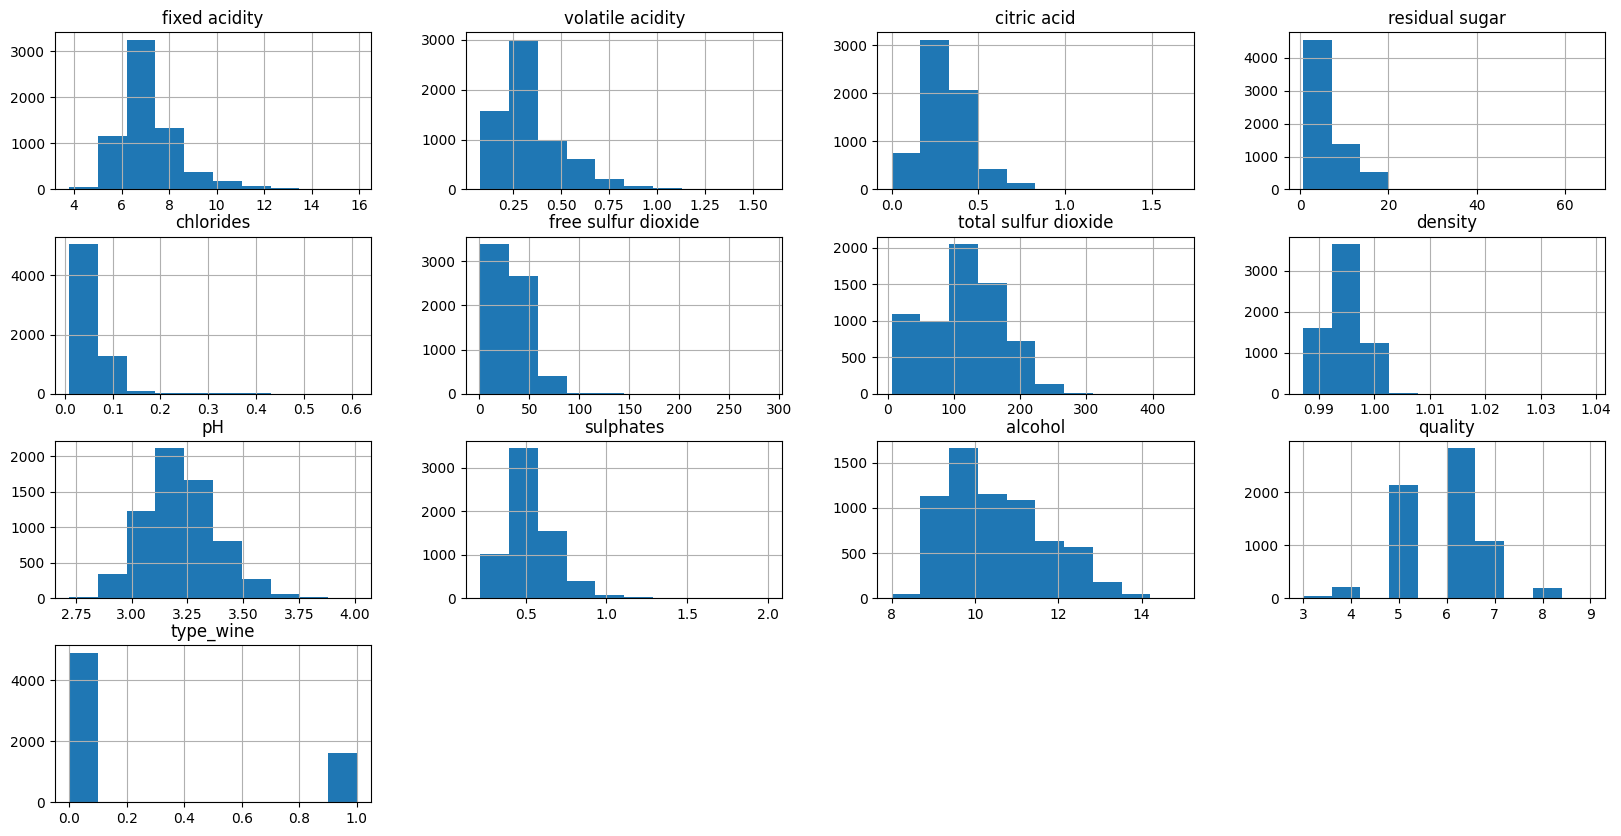

In [23]:
df.hist(figsize=(20,10));

**Hypothèse** : Si nous subdivisons notre data set par rapport à la qualité du vin c'est-à-dire (si la qualité est >= 7, le vin est de bonne qualité) et (si la qualité est < 7, le vin est de mauvaise qualité)

In [24]:
df[df.quality >= 7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
count,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,7.085709,0.28917,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966,0.169930
std,1.342832,0.11696,0.110040,4.063824,0.021014,15.344154,47.126201,0.003007,0.159094,0.161521,1.215620,0.376348,0.375718
min,3.900000,0.08000,0.000000,0.800000,0.012000,3.000000,7.000000,0.987110,2.840000,0.220000,8.500000,7.000000,0.000000
25%,6.300000,0.20000,0.280000,1.800000,0.033000,20.000000,87.000000,0.990720,3.120000,0.420000,10.700000,7.000000,0.000000
50%,6.900000,0.27000,0.320000,2.900000,0.039000,31.000000,114.000000,0.992280,3.220000,0.510000,11.500000,7.000000,0.000000
75%,7.400000,0.34000,0.380000,6.500000,0.051000,40.000000,140.000000,0.995000,3.340000,0.640000,12.400000,7.000000,0.000000
max,15.600000,0.91500,0.760000,19.250000,0.358000,108.000000,289.000000,1.003200,3.820000,1.360000,14.200000,9.000000,1.000000


In [25]:
df[df.quality < 7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,7.247011,0.352019,0.314720,5.593812,0.058837,30.395690,117.176533,0.995105,3.216262,0.528768,10.261462,5.490421,0.264751
std,1.282968,0.172094,0.152466,4.901269,0.037145,18.288715,58.506354,0.002852,0.161135,0.145434,1.067408,0.605987,0.441243
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987220,2.720000,0.230000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.040000,16.000000,74.000000,0.993000,3.110000,0.430000,9.400000,5.000000,0.000000
50%,7.000000,0.300000,0.300000,3.000000,0.049000,28.000000,119.000000,0.995400,3.200000,0.510000,10.000000,6.000000,0.000000
75%,7.700000,0.430000,0.400000,8.300000,0.069000,42.000000,160.000000,0.997200,3.320000,0.590000,11.000000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,6.000000,1.000000


Remarquez que le taux d'alcool est très déterminant afin d'avoir un vin de bonne qualité puisque les vins de bonne qualité ont un taux moyen de 11.00 et les vins de mauvaise qualité ont un taux moyen de 10.00. C'est quand même très déterminant

**Matrice de correlation**

In [26]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<Axes: >

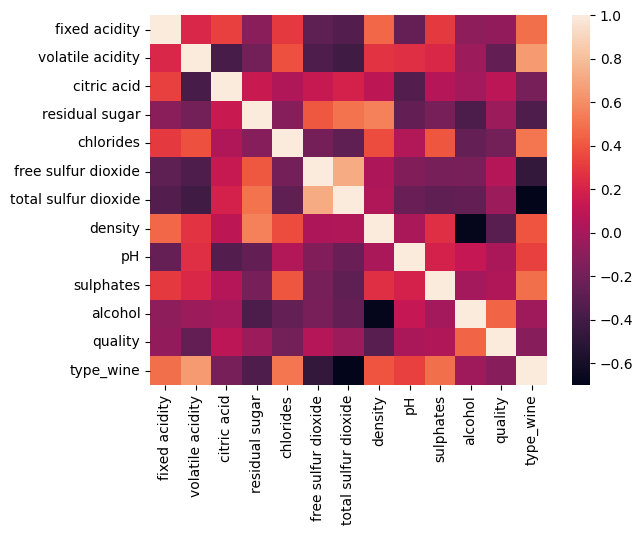

In [27]:
sns.heatmap(df.corr())

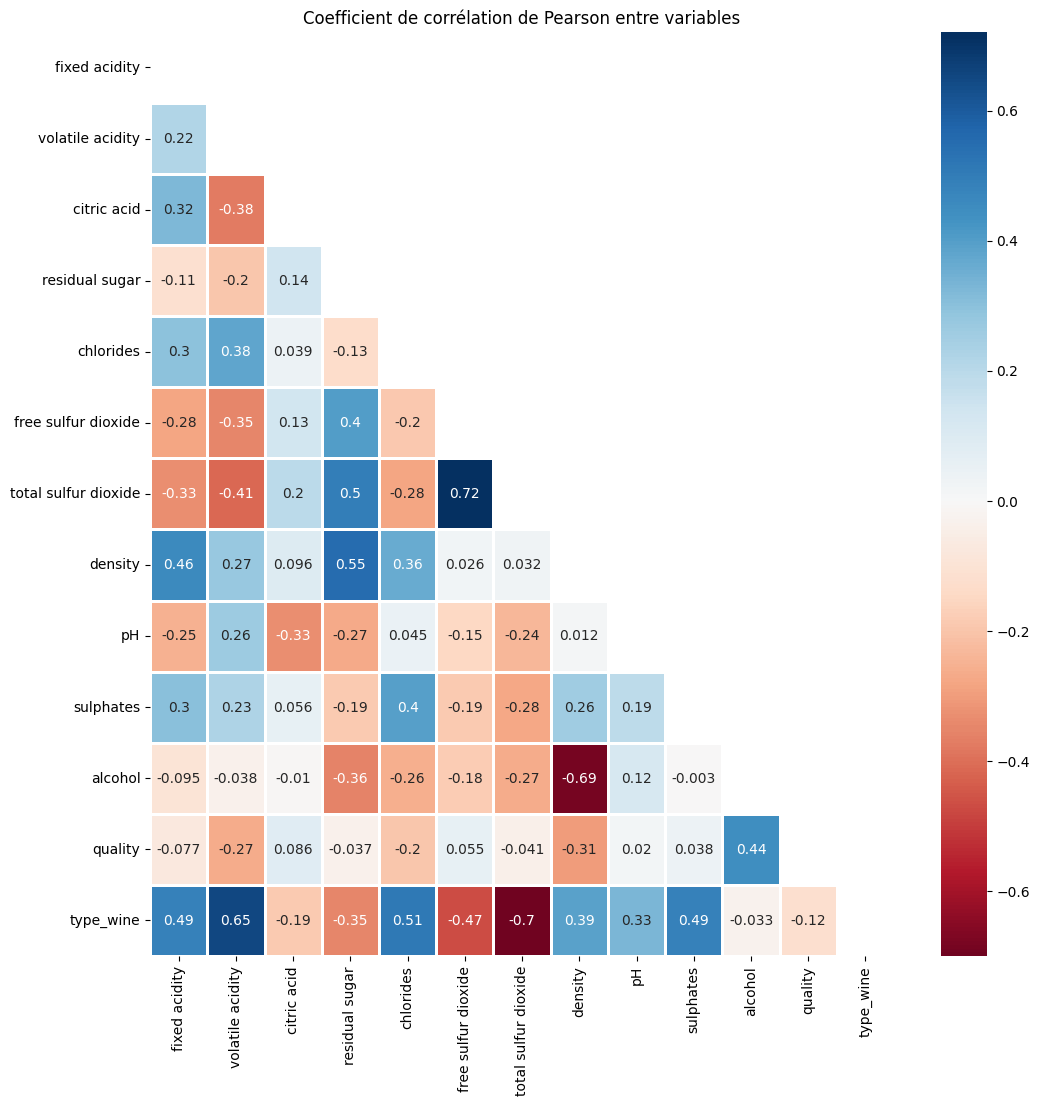

In [29]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True)
plt.title('Coefficient de corrélation de Pearson entre variables')
plt.show()

### **Prétraitement**

In [31]:
 #Comment par importer le module train_test_split
 from sklearn.model_selection import train_test_split

Nous allons separer notre data set afin d'avoir nos données composer des variables indépendante (X) et nos données de la variable dépendante (y)

In [32]:
X = df.drop("quality",axis=1)
y = df["quality"]

Nous allons également creer une graine aléatoire (seed) pour s'assurer de la reproductibilié de nos resultats car il s'agit d'une division aléatoire. Il faut donc que nous puissions nous assurer de toujours avoir le même ensemble de test et d'entrainement qui sont retourné lorque nous relançons notre environnement.

In [33]:
seed = 33
X_train, X_test, y_train,y_test = train_test_split(
    X,y, random_state=seed, test_size=0.2
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5197, 12) (5197,) (1300, 12) (1300,)


## **Mise à l'echelle ou une standardization**

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[ 0.38106424, -0.42333744,  0.152051  , ..., -0.35328639,
         1.35085185, -0.57046226],
       [ 1.62710737,  1.9359534 , -0.40374927, ..., -0.75380179,
        -0.74429444,  1.75296435],
       [-1.56587815,  0.15882524, -1.65429985, ..., -0.9540595 ,
        -0.49287688, -0.57046226],
       ...,
       [ 1.23771889,  0.80226819,  1.19417649, ...,  0.44774442,
        -0.57668273,  1.75296435],
       [-1.33224506, -0.66845857, -0.89007449, ..., -0.68704923,
        -0.07384762, -0.57046226],
       [ 0.30318655, -0.05565575,  0.22152603, ..., -0.9540595 ,
         1.267046  , -0.57046226]])

Nous devons éffectuer une validation croiser afin de faire le choix sur le modèle que nous allons utiliser en utilisant l'erreur quadratique moyen.

Le cross_validation_score nous permet de nous assurer que toute les observations apparaissent dans les données d'entrainement et de test ! Le metrique d'evaluation est donc fiable.

Pour mieux comprendre ce concept, il s'agit d'un processus où l'on divise les données en données d'entrainement et de test ! Le cross validation s'assure que toutes les observations des nos données puissent se retrouver dans les données d'entrainement et de test ! Ainsi, nous somme sûre la metrique d'évaluation est fiable

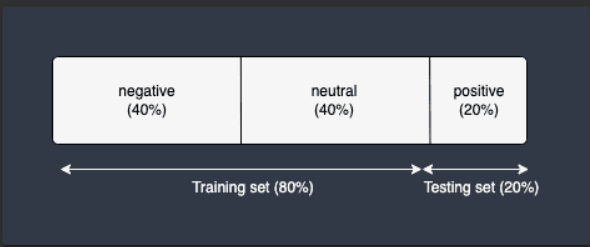

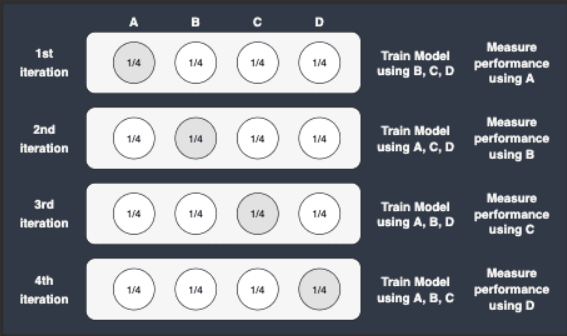

In [37]:
lr_cve = cross_val_score(
    LinearRegression(),
    X_train_scaled,
    y_train,
    cv=3,
    scoring= "neg_root_mean_squared_error"

)


rf_cve = cross_val_score(
    RandomForestRegressor(random_state=seed),
    X_train_scaled,
    y_train,
    cv=3,
    scoring= "neg_root_mean_squared_error"

)

svm_cve = cross_val_score(
    SVR(),
    X_train_scaled,
    y_train,
    cv=3,
    scoring= "neg_root_mean_squared_error"

)

In [38]:
lr_cve

array([-0.73253584, -0.73110956, -0.72582852])

In [39]:
rf_cve

array([-0.62019518, -0.63840678, -0.6369258 ])

In [40]:
svm_cve

array([-0.67342018, -0.68137323, -0.67191659])

In [41]:
print("RF : ", rf_cve.mean(), "LR : ",lr_cve.mean(), "SVM : ", svm_cve.mean())

RF :  -0.6318425906491011 LR :  -0.7298246371416165 SVM :  -0.6755700011223958


D'après les resultats que nous avaons, le modèle qui semble être le plus performant est celle du RandomForest car l'erreur quadratique moyen est plus optimale

## **Construire le modèle**

In [42]:
model = RandomForestRegressor(random_state=seed)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=33)

## **Prediction sur les données de test standardize**

In [43]:
y_pred = model.predict(X_test_scaled)
y_pred

array([6.4 , 5.82, 6.25, ..., 5.38, 5.09, 4.98])

## **Evaluation du modèle avec l'erreur quadratique moyen**

In [44]:
mean_squared_error(y_test, y_pred, squared=False)

0.6307860176002635

Chaque value (score) prédit par notre modèle, le véritable score se situe entre cetta **valeur** - **mean_squared_error** et cette **valeur** + mean_squared_error

## **Attribut importante et conclusion**

C'est la partie la plus important en entreprise car c'est la partie qui repond à la problématique business. L'objecctif que nous nous sommes fixés c'est de trouver les attributs necessaires pour favbriquer un vin de qualité afin d'aider les producteurs à optimiser leurs efforts personnelles.

L'objectif c'est de trouver les paramètres physico-chimiques les plus impactant sur la qualité du vin afin d'aiser les producteurs à jouer avec ses paramètres aux niveaux de leurs échantillons aux labo afin d'avoir un vin de qualité.

**Nous pouvons visualiser l'importance de chaque variable indépendante à la mise en place d'un vin de qualité**

In [45]:
model.feature_importances_

array([0.05438907, 0.128995  , 0.06012551, 0.07411797, 0.06590424,
       0.08302336, 0.0727574 , 0.05769381, 0.06995162, 0.07491607,
       0.25618198, 0.00194397])

In [62]:
variable_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)*100
variable_importance

alcohol                 25.618198
volatile acidity        12.899500
free sulfur dioxide      8.302336
sulphates                7.491607
residual sugar           7.411797
total sulfur dioxide     7.275740
pH                       6.995162
chlorides                6.590424
citric acid              6.012551
density                  5.769381
fixed acidity            5.438907
type_wine                0.194397
dtype: float64

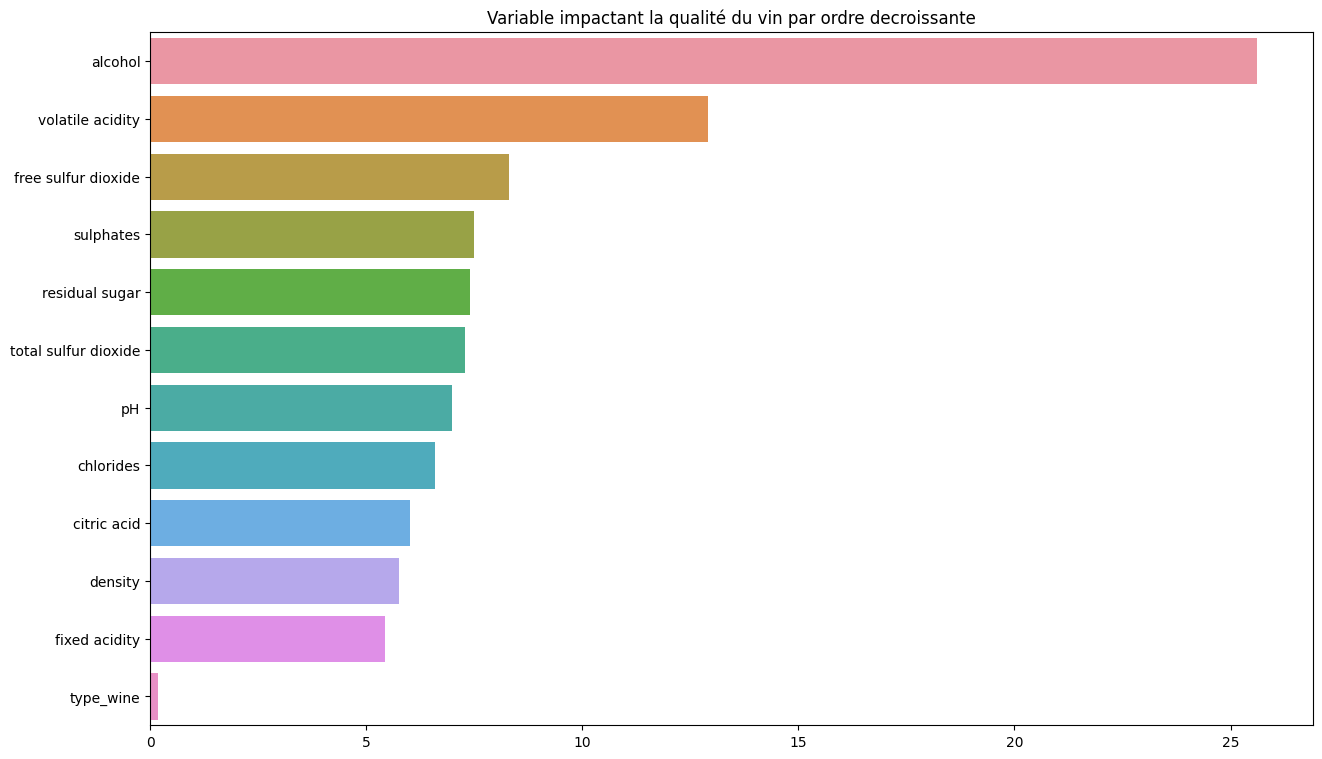

In [71]:
plt.figure(figsize=(15, 9))
sns.barplot(x=variable_importance, y=variable_importance.index)
plt.title("Variable impactant la qualité du vin par ordre decroissante")
plt.show()

Les variable indépendantes qui sont le plus importantes dans la qualité d'un vi sont les suivantes :


* alcohol
* volatile acidity
* free sulfur dioxide



**Done By Spaak Jobrigh::**